In [10]:
import pandas as pd 
from sklearn import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# ML Model

In [187]:
ml_df = pd.read_csv('preprocessed_iot.csv')

ml_df.drop(columns=['Unnamed: 0'], inplace=True)
ml_df.drop(columns=['Unnamed: 0.1'], inplace=True)


In [189]:
ml_df

,id_orig_p,id_resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,bwd_header_size_min,...,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl,Attack_type_Attack
0,38667,1883,32.011598,9,5,0.281148,0.555556,296,32,32,...,False,False,False,False,True,False,False,False,False,False
1,51143,1883,31.883584,9,5,0.282277,0.555556,296,32,32,...,False,False,False,False,True,False,False,False,False,False
2,44761,1883,32.124053,9,5,0.280164,0.555556,296,32,32,...,False,False,False,False,True,False,False,False,False,False
3,60893,1883,31.961063,9,5,0.281593,0.555556,296,32,32,...,False,False,False,False,True,False,False,False,False,False
4,51087,1883,31.902362,9,5,0.282111,0.555556,296,32,32,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,0.000006,1,1,167772.160000,1.000000,20,20,20,...,False,False,False,False,False,False,False,False,False,True
123113,59247,64623,0.000007,1,1,144631.172414,1.000000,20,20,20,...,False,False,False,False,False,False,False,False,False,True
123114,59247,64680,0.000006,1,1,167772.160000,1.000000,20,20,20,...,False,False,False,False,False,False,False,False,False,True
123115,59247,65000,0.000006,1,1,167772.160000,1.000000,20,20,20,...,False,False,False,False,False,False,False,False,False,True


In [191]:
noboolean_df = ml_df.select_dtypes(exclude=['bool'])

In [195]:
features = noboolean_df
target = ml_df["Attack_type_Attack"]
features.columns

Index(['id_orig_p', 'id_resp_p', 'flow_duration', 'fwd_pkts_tot',
       'bwd_pkts_tot', 'fwd_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'bwd_header_size_min',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload_min', 'fwd_pkts_payload_max', 'fwd_pkts_payload_tot',
       'fwd_pkts_payload_avg', 'bwd_pkts_payload_min', 'bwd_pkts_payload_max',
       'bwd_pkts_payload_avg', 'flow_pkts_payload_min',
       'flow_pkts_payload_avg', 'flow_pkts_payload_std', 'fwd_iat_min',
       'fwd_iat_max', 'fwd_iat_avg', 'bwd_iat_min', 'bwd_iat_max',
       'bwd_iat_tot', 'bwd_iat_avg', 'flow_iat_min', 'flow_iat_avg',
       'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes',
       'fwd_bulk_bytes', 'fwd_bulk_rate', 'bwd_bulk_rate', 'active_min',
       'act

In [197]:
corr_df = noboolean_df.corr()

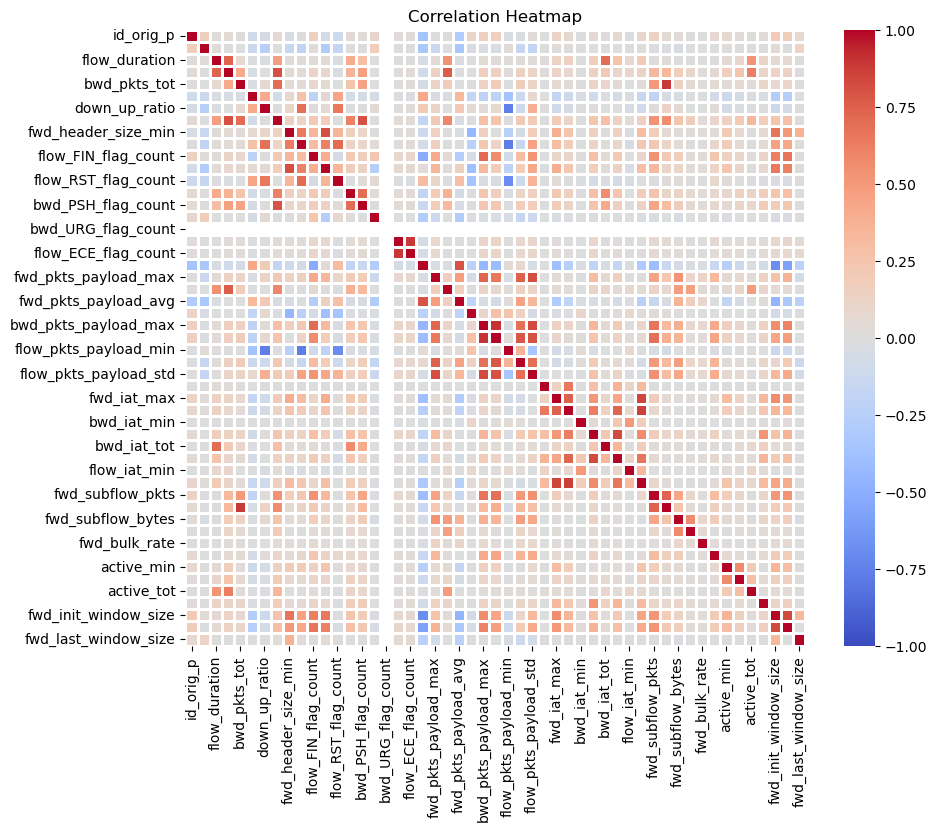

In [199]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [201]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

#Normalize Data after Train Split
normalizer = MinMaxScaler() #define normalizer

normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train) # Normalize 80% training dats
X_test_norm = normalizer.transform(X_test) # Normalize 20% Testing Data

#Apply to test and training data
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# Test Balancing Dataset with Undersampling

In [7]:
pip install imbalanced_learn

Note: you may need to restart the kernel to use updated packages.


In [203]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=0)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train_norm, y_train)

#Check distribution again

# Logistic Regression

In [206]:
# Train the Logistic Regression model on the undersampled data
log_reg_undersampled = LogisticRegression(random_state=42)
log_reg_undersampled.fit(X_resampled_under, y_resampled_under)

# Evaluate the model on the test set
y_pred_undersampled = log_reg_undersampled.predict(X_test)
classification_rep_undersampled = classification_report(y_test, y_pred_undersampled)
conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)

# Print the results
print("Classification Report (Undersampled):")
print(classification_rep_undersampled)
print("Confusion Matrix (Undersampled):")
print(conf_matrix_undersampled)


Classification Report (Undersampled):
              precision    recall  f1-score   support

       False       0.76      0.79      0.78      2542
        True       0.98      0.97      0.97     22082

    accuracy                           0.95     24624
   macro avg       0.87      0.88      0.88     24624
weighted avg       0.95      0.95      0.95     24624

Confusion Matrix (Undersampled):
[[ 2008   534]
 [  618 21464]]


# Random Forest

In [216]:
# Train the Random Forest model on the undersampled data
rf_undersampled = RandomForestClassifier(random_state=0)
rf_undersampled.fit(X_resampled_under, y_resampled_under)

# Evaluate the model on the test set
y_pred_undersampled_rf = rf_undersampled.predict(X_test)
classification_rep_undersampled_rf = classification_report(y_test, y_pred_undersampled_rf)
conf_matrix_undersampled_rf = confusion_matrix(y_test, y_pred_undersampled_rf)

# Print the results
print("Classification Report (Undersampled with Random Forest):")
print(classification_rep_undersampled_rf)
print("Confusion Matrix (Undersampled with Random Forest):")
print(conf_matrix_undersampled_rf)

Classification Report (Undersampled with Random Forest):
              precision    recall  f1-score   support

       False       0.10      0.98      0.19      2542
        True       0.92      0.03      0.05     22082

    accuracy                           0.13     24624
   macro avg       0.51      0.50      0.12     24624
weighted avg       0.83      0.13      0.07     24624

Confusion Matrix (Undersampled with Random Forest):
[[ 2485    57]
 [21464   618]]


# Test Balancing with Smote

In [210]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_norm, y_train)



# Logistic Regression

In [212]:
# Train the Logistic Regression model on the SMOTE resampled data
log_reg_smote = LogisticRegression(random_state=0)
log_reg_smote.fit(X_resampled_smote, y_resampled_smote)

# Evaluate the model on the test set
y_pred_smote = log_reg_smote.predict(X_test_norm)
classification_rep_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Print the results
print("Classification Report (SMOTE):")
print(classification_rep_smote)
print("Confusion Matrix (SMOTE):")
print(conf_matrix_smote)


Classification Report (SMOTE):
              precision    recall  f1-score   support

       False       0.72      0.99      0.83      2542
        True       1.00      0.96      0.98     22082

    accuracy                           0.96     24624
   macro avg       0.86      0.97      0.90     24624
weighted avg       0.97      0.96      0.96     24624

Confusion Matrix (SMOTE):
[[ 2509    33]
 [  992 21090]]


In [75]:
y_resampled_smote.value_counts()

Attack_type_Attack
True     88528
False    88528
Name: count, dtype: int64

# SVM

In [23]:
from sklearn.svm import SVC

# Train the SVM model on the SMOTE resampled data
svm_smote = SVC(random_state=0)  
svm_smote.fit(X_resampled_smote, y_resampled_smote)

# Evaluate the model on the test set
y_pred_smote_svm = svm_smote.predict(X_test_norm)
classification_rep_smote_svm = classification_report(y_test, y_pred_smote_svm)
conf_matrix_smote_svm = confusion_matrix(y_test, y_pred_smote_svm)

# Print the results
print("Classification Report (SMOTE with SVM):")
print(classification_rep_smote_svm)
print("Confusion Matrix (SMOTE with SVM):")
print(conf_matrix_smote_svm)


Classification Report (SMOTE with SVM):
              precision    recall  f1-score   support

       False       0.92      1.00      0.96      2542
        True       1.00      0.99      1.00     22082

    accuracy                           0.99     24624
   macro avg       0.96      0.99      0.98     24624
weighted avg       0.99      0.99      0.99     24624

Confusion Matrix (SMOTE with SVM):
[[ 2540     2]
 [  217 21865]]


# Random Forest

In [214]:
# Train the Random Forest model on the SMOTE resampled data
rf_smote = RandomForestClassifier(random_state=0)
rf_smote.fit(X_resampled_smote, y_resampled_smote)

# Evaluate the model on the test set
y_pred_smote = rf_smote.predict(X_test_norm)
classification_rep_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Print the results
print("Classification Report (SMOTE with Random Forest):")
print(classification_rep_smote)
print("Confusion Matrix (SMOTE with Random Forest):")
print(conf_matrix_smote)

Classification Report (SMOTE with Random Forest):
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2542
        True       1.00      1.00      1.00     22082

    accuracy                           1.00     24624
   macro avg       1.00      1.00      1.00     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix (SMOTE with Random Forest):
[[ 2538     4]
 [   19 22063]]


# Grid Search / Random Search

In [ ]:
# Define the base Random Forest model
rf_smote = RandomForestClassifier(random_state=0)

# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],}

# Apply Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_smote, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit Grid Search on the SMOTE-resampled training data
grid_search.fit(X_resampled_smote, y_resampled_smote)

# Print best parameters from Grid Search
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Hypertuning

In [ ]:
# Evaluate the Grid Search best model on the test set
y_pred_grid_search = grid_search.best_estimator_.predict(X_test_norm)
classification_rep_grid_search = classification_report(y_test, y_pred_grid_search)
conf_matrix_grid_search = confusion_matrix(y_test, y_pred_grid_search)

print("\nClassification Report (Grid Search with Random Forest):")
print(classification_rep_grid_search)
print("Confusion Matrix (Grid Search with Random Forest):")
print(conf_matrix_grid_search)

# Simulating IoT Datafeed

In [ ]:
import time  # Simulate real-time delay

# Ensure that the DataFrame used for real-time predictions is aligned with training features
realtime_df = ml_df.drop(columns=['Attack_type_Normal'])

# Adjusted real-time prediction function using iot_df
def real_time_prediction_from_df(row):
    import time
    # Convert the row to a DataFrame format to maintain compatibility
    new_data_df = pd.DataFrame([row], columns=realtime_df.columns.drop('Attack_type_Attack'))  # Exclude target column
    
    # Normalize the new data using the existing MinMaxScaler
    new_data_scaled = normalizer.transform(new_data_df)  # Ensure consistent scaling
    
    # Predict using the trained RandomForest model
    prediction = rf_smote.predict(new_data_scaled)
    
    # Return the prediction label
    return prediction



In [ ]:
# Function to shuffle and simulate real-time data feeding with row and probability printing
def simulate_real_time_feed_from_df(df, delay=1):
    # Shuffle the DataFrame to randomize row order
    #shuffled_df = df.sample(frac=1, random_state=90).reset_index(drop=True)
    
    for _, row in df.iterrows():
        # Drop the 'Attack_type' columns for prediction
        new_data_row = row.drop(['Attack_type_Attack', 'Attack_type_Normal'], errors='ignore')

        # Align with training features (X_train columns)
        new_data_row = new_data_row[X_train_norm.columns]
        
        # Print the row's feature values
        print("\nFeature Values:")
        print(new_data_row)

        # Get the prediction and probabilities
        prediction = real_time_prediction_from_df(new_data_row)
        prediction_proba = rf_smote.predict_proba([new_data_row])
        
        # Print the prediction result and probabilities
        print(f"\nPredicted Attack Type: {prediction[0]}")
        print(f"Prediction Probabilities: {prediction_proba[0]}")
        
        # Simulate real-time delay
        time.sleep(delay)

# Example use:
# Simulate using a randomized order of the first 10 rows of the preprocessed iot_df for real-time prediction
simulate_real_time_feed_from_df(iot_df[:10], delay=2)  # Adjust number of rows and delay as needed

In [ ]:
# Check class distribution in the original training target data
print("Class distribution in the original training data:")
print(y_train.value_counts(normalize=True))  # Use 'normalize=True' to show percentages

# Check class distribution in the SMOTE-resampled training data
print("\nClass distribution in the SMOTE-resampled training data:")
print(pd.Series(y_resampled_smote).value_counts(normalize=True))  # Assuming y_resampled_smote is the resampled target

# Check class distribution in the test data
print("\nClass distribution in the test data:")
print(y_test.value_counts(normalize=True))

# Check class distribution in the real-time prediction dataset (if applicable)
print("\nClass distribution in the real-time prediction dataset:")
print(iot_df['Attack_type_Attack'].value_counts(normalize=True))  # Adjust 'Attack_type' to your actual target column name


In [ ]:
# Print prediction probabilities for the first 10 rows of the test set
for i, prob in enumerate(rf_smote.predict_proba(X_test_norm[:10])):
    print(f"Row {i+1}: Probability of False: {prob[0]:.2f}, Probability of True: {prob[1]:.2f}")
